# la vectorisation

ou comment écrire du code efficace; ou encore comment **ne jamais faire de boucle `for`** sur un tableau `numpy`.

Nous avons appris que la librairie numpy est utilisée pour la création et la manipulation de tableaux.

`numpy` est d'autant plus intéressante si vos tableaux sont gourmands en place mémoire ou si vous avez besoin de calculs spécifiques (genre algèbre linéaire).

Si vous n'avez besoin que de petits tableaux et de fonctionnalités de base, les listes de listes de Python peuvent vous suffire.  


(Pour avoir une idée de ce que représente *petit*, on peut comparer les temps d'exécution de deux codes)

Les tableaux `numpy`, contrairement aux listes Python, sont homogènes. Tous les éléments d'un tableau numpy ont le même type.

Par extension, tous les éléments ont la même taille et bingo ! cela leur permet de représenter dans la mémoire nos données dans un segment continu où les éléments sont contigus.

Ainsi à partir du moment où vous *êtes* à un endroit du tableau, passer (relativement) un autre endroit de ce même tableau est presque immédiat (décalage, offset). Cela ne demande pas à l'ordi de rechercher une nouvelle adresse en mémoire (indirection).

Pourquoi nous vous racontons cela ? Pour vous expliquer comment les fonctions, appelées *fonctions vectorisées*, de `numpy` vont faire pour aller **beaucoup** plus vite que d'applique la même fonction successivement à chaque élément d'un tableau, par exemple dans un for-Python.

In [1]:
import numpy as np

## appliquons une fonction à un `ndarray`

Il existe de tas de fonctions dans `numpy`, comme par exemple les fonctions trigonométriques. Prenons la fonction `np.sin` et appliquons là pour créer un tableau `abscisse` de 10.000 nombres flottants linéairement espacés entre 0 et 2π.    
Vous rappelez vous comment créer un tel tableau ?

In [2]:
abscisse = np.linspace(0, 2*np.pi, 10000)

Maintenant nous allons appliquer la fonction `np.sin` à tout le `np.ndarray` d'un seul coup.

In [3]:
np.sin(abscisse)

array([ 0.00000000e+00,  6.28381328e-04,  1.25676241e-03, ...,
       -1.25676241e-03, -6.28381328e-04, -2.44929360e-16])

Ces fonctions qui s'appliquent à tout un tableau sans avoir besoin d'écrire de boucle d'itération s'appellent des fonctions **vectorisées**.

Maintenant calculez le temps d'exécution du calcul vectorisé du sinus sur la tableau *abscisse*.

In [4]:
#timeit?

In [5]:
%timeit np.sin(abscisse)

119 µs ± 22.5 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Parcourons ensuite le tableau *abscisses* avec une boucle Python et calculons les 10.000 sinus. Comme un `np.ndarray` est un itérable (quelque chose qui se parcourt avec un *for* Python), parcourons et appliquons à chaque élément la fonction `np.sin`.

In [6]:
%%timeit
for i in abscisse:
    np.sin(i)

11.2 ms ± 93.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Que constatez-vous ? Que la version vectorisée prend autour de 25 micro-secondes (sur mon ordi) alors que la version Python non vectorisée prend ... autour de 15 milli-secondes ! on gagne un facteur ... ? combien ? ouhla c'est vraiment beaucoup non ?

Ainsi, appliquer une fonction vectorisée à tout un tableau `np.ndarray` est **très très très efficace** et c'est l'ingrédient **principal** d'un **code numérique rapide**.

Il ne faut **jamais** jamais jamais parcourir un tableau `numpy` avec une boucle for-Python pour appliquer une fonction qu'on peut appliquer de manière **vectorisée**.

Il faut utiliser les fonctions **vectorisées** de manière vectorisée.

Bien sûr, le tableau sera bien parcouru à un moment donné ! mais le parcours est codé dans un langage proche de la machine (à-la c/c++) qui, pour passer d'un élément à l'élément suivant, fait un simple décalage en mémoire et ne vas pas rechercher une *nouvelle* adresse en mémoire.

Parce qu'il est plus simple de voir les résultats des calculs de manière graphique, nous allons importer une librairie de visualisation de données qui s'appelle `matplotlib`. Elle sera expliquée plus en détails dans un autre notebook, commencons à l'utiliser très simplement.

In [7]:
# plt est le nom standard donné à matplotlib.pyplot (qui lui est super looooong à utiliser) 
import matplotlib.pyplot as plt

In [8]:
# on va demander à ce que les courbes s'affichent dans le notebook
%matplotlib inline

On dessine le sinus de 0 à 2$\pi$

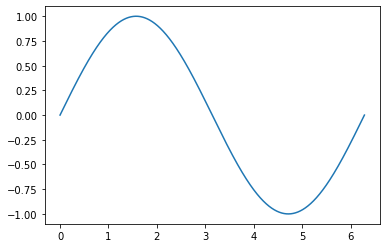

In [9]:
plt.plot(abscisse, np.sin(abscisse)) # plot(x, f(x))

Signalons tout de suite un petite astuce; vous voyez sur cet affichage, avant la courbe qui nous intéresse, une scorie  
`[<matplotlib.lines.Line2D at ...>]`  
qui est le résultat (l'objet Python) de l'évaluation; si on veut s'en débarrasser il suffit d'ajouter un `;` à la fin comme ceci :

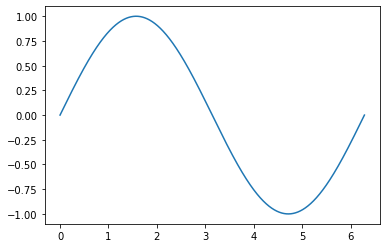

In [10]:
# on peut enlever la scorie 
# en ajoutant le point virgule ici   ⬇
plt.plot(abscisse, np.sin(abscisse)) ;

pourquoi ça marche ? en fait on demande à Python d'évaluer deux choses, le plot, et une instruction vide - qui est là à cause du point-virgule  
bref, ça n'est pas super propre mais ça fonctionne bien et c'est un idiome utilisé très souvent dans les notebooks

Sauriez-vous dessiner un cercle d'un rayon *r* ? Réfléchissez ? Un indice ci-dessous ...

Le truc qu'il faut remarquer ici, c'est que les deux tableaux qu'on passe à `plot` sont des couples (x, y), donc rien ne vous contraint à une fonction explicite (dans le sens $f: \mathbb{R}\rightarrow\mathbb{R}$), et une représentation paramétrique est tout à fait possible !

In [11]:
# votre code ici - la correction un peu plus loin ci-dessous

Il suffit donc de dessiner deux tableaux de points contenant les $r \times \sin(\theta)$ et $r \times \cos(\theta)$ avec $x$ qui varie de 0 à 2$\pi$ ...

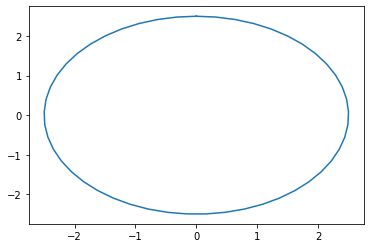

In [12]:
# correction (pzas encore parfaite)
r = 2.5
theta = np.linspace(0, 2*np.pi)
x = r*np.sin(theta)
y = r*np.cos(theta)

plt.plot(x, y); # oups on obtient une ellipse !

Une dernière astuce enfin, si on ne fait rien de spécial, `matplotlib` va choisir les échelles pour nous; du coup pour bien voir le cercle et pas une ellipse, il faut imposer à *matplotlib.pyplot* de garder ses axes à la même échelle (égaux):
```
plt.axis('equal')
```

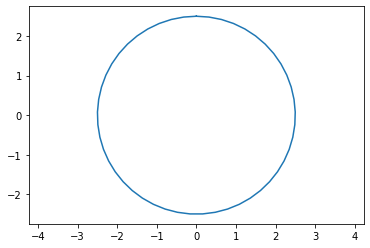

In [13]:
# correction
r = 2.5
theta = np.linspace(0, 2*np.pi)
x = r*np.sin(theta)
y = r*np.cos(theta)

plt.plot(x, y)
plt.axis('equal'); # (attention le notebook montre la figure i.e. il fait un plt.show)

Remarquez que nous faisons tous ces calculs *sans même savoir comment accéder aux éléments d'un tableau*, vous vous doutez bien qu'on va pouvoir le faire et on le fera, mais pour l'instant nous n'en avons pas eu besoin... nous avons laissé `numpy` accéder aux éléments.

Faites une fonction polynomiale qui retourne par exemple $x^3 + 2x^2 -5x +1$, appliquez la à un `np.ndarray`. Que se passe-t-il ?

In [14]:
def scalar_function(x):
    # votre code ici
    pass

In [15]:
scalar_function(np.array((10, 20)))

Mais oui tout se passe très bien ... il est tout à fait possible de mettre un tableau `np.ndarray` à une puissance que ce soit à l'aide de l'opérateur `**` de Python, ou de `np.power`

Le mécanisme général qui applique une fonction à un tableau est connu sous le terme de *Universal function*, ou 
`ufunc`, ça peut vous être utile avec les moteurs de recherche !

En conclusion *y-a pas photo !* Utilisez toujours les fonctions vectorisées de `numpy` !

Même si cela peut vous paraître, au début, un peu plus difficile que la version utilisant une boucle for-Python, vous ne pouvez pas y échapper par souci de la **performance en temps**.

C'est juste une autre manière de penser le code et franchement vous allez écrire des codes tellement plus compacts et lisibles (élégants).

## Quelles sont les fonctions vectorisées ?

### les opérateurs arithmétiques classiques

Les opérateurs classiques quand ils sont appliqués sur des `np.ndarray` sont en fait de nouvelles fonctions vectorisées (des *UFuncs*) de `numpy` en voici la correspondance.

Voici les opérateurs arithmétiques classiques avec leur contre-partie `numpy` (*Ufuncs*):


| opérateur | `numpy` fonction    |
|----------|-------------------|
|   $+$    | `np.add` |
|   $-$    | `np.substract`|
|   $*$    | `np.multiply` |
|   $/$    | `np.divide` |
|   $//$   | `np.floor_divide` |
|   $\%$   | `np.mod` |
|   $**$   | `np.power` |

### les fonctions trigonométriques, de comparaison...

| fonction         | `numpy` fonction    |
|------------------|-------------------|
| comparaison       | `np.greater`, `np.less`, `np.equal`, ...|
|   valeur absolue       | `np.absolute` or `np.abs` |
|   trigonometrie   | `np.sin`, `np.cos`, ... |
|   exponentielle | `np.exp`, `np.exp2`, .. |
|   logarithme      | `np.log`, `np.log2`, `np.log10` |

La plupart du temps vous allez les utiliser sans même vous en rendre compte...

Pour le savoir ? Demandez à une fonction quel est son type:

In [16]:
np.add

<ufunc 'add'>

In [17]:
np.power

<ufunc 'power'>

## résultats intermédiaires des calculs

Puisque nous appliquons plusieurs opérations à la suite les unes des autres à des tableaux,  
des espaces mémoire intermédiaires doivent bien être crées pour recevoir les résultats de ces calculs.

Prenons une fonction:

In [18]:
def trigo_function_compact (x):
    return 4*np.exp(np.cos(x))**2

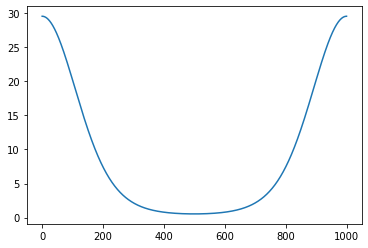

In [19]:
plt.plot(trigo_function_compact(np.linspace(0, 2*np.pi, 1000)));

De combien de tableaux intermédiaires avez vous besoin pour le calcul de la fonction *trigo_function* ? beaucoup ! Comptez-les en développant les calculs i.e. en créant un tableau intermédiaire par calcul unitaire nécessaire.

In [20]:
# votre code ici (la solution est juste dessous)

In [21]:
def trigo_function_developpee (x):
    int_1 = np.cos(x)
    int_2 = np.exp(int_1)
    int_3 = np.power(int_2, 2)
    result = 4*int_3
    return result

On peut remplacer la multiplication * par la fonction `np.multiply` (element-wise ou Hadamard product) qui est équivalente.

In [22]:
def trigo_function_developpee (x):
    int_1 = np.cos(x)
    int_2 = np.exp(int_1)
    int_3 = np.power(int_2, 2)
    result = np.multiply(4, int_3)
    return result

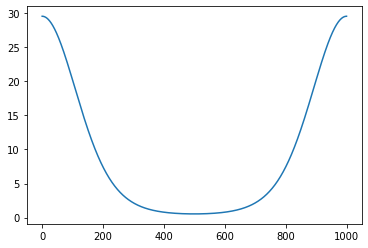

In [23]:
plt.plot(trigo_function_developpee(np.linspace(0, 2*np.pi, 1000)));

Donc notre calcul crée trois tableaux intermédiaires (*int_1*, *int_2*, *int_3*) et un tableau pour le résustat final (*result*), donc *3 x abscisse.nbytes* octets (*180.000*) perdus.

En effet lorsque l'on fait du calcul vectoriel, on va avoir tendance à créer de nombreux tableaux intermédiaires qui coûtent cher en mémoire.

Pour cette raison, pratiquement tous les opérateurs de `numpy` sont dotés d'un paramètre optionnel `out=` qui permet de spécifier un tableau déjà alloué, dans lequel ranger le résultat. Prenons un exemple plus simple:

Voici la même fonction sans créer de tableaux intermédiaires inutiles.

In [24]:
def trigo_function_developpee_out (x):
    result = np.cos(x)      # il m'en faut bien un pour le résultat !
    np.exp(result, out=result)
    np.power(result, 2, out=result)
    np.multiply(4, result, out=result)
    return result

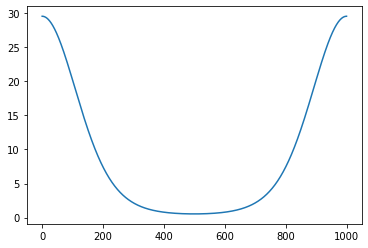

In [25]:
plt.plot(trigo_function_developpee_out(np.linspace(0, 2*np.pi, 1000)));

**important** Vous pouvez remarquer que ce code est beaucoup plus compliqué à écrire que dans sa version compacte simple et "directe". Il sera donc beaucoup plus propice à des erreurs ...  et il est franchement très difficile à lire !  
En conclusion: ne faites surtout pas cela systématiquement.

Vous savez que ça existe. Vous y penserez si, dans un de vos codes numériques, la création de tableaux intermédiaires commence à prendre une place bien trop importante.

## on vectorise sa fonction

A vous de jouer, vous allez écrire la fonction `my_absolute` qui calcule la valeur absolue d'un scalaire x sans utiliser  `numpy` ni `abs` de Python.

In [26]:
#votre code ici (pas de correction le code est évident)

def my_absolute (x):
    ...

Appelez la fonction sur le scalaire *-20* ? Elle fonctionne super bien !

In [27]:
my_absolute(-20)

Créez un `np.ndarray` avec \[-10, -20, 30\] et appliquez lui la fonction *my_absolute*.

In [28]:
# votre code ici

Que se passe-t-il ? Ca ne va plus du tout ! Vous recevez une ValueError et un message (un peu cryptique) à propos de l'ambiguité d'utiliser le résultat de l'application d'une comparaison logique à un tableau avec plus d'un élément ...

Alors le tableau c'est bien sûr votre `np.ndarray` \[-10, -20, 30\]. Et ce qu'on vous reproche n'est pas d'appliquer la fonction de comparaison à ce tableau `np.ndarray`, qui se fait comme cela:

In [29]:
np.array([-10, -20, 30]) < 0

array([ True,  True, False])

`numpy` sait parfaitement le faire ! L'opérateur de comparaison *\<* a sa version vectorisée en `numpy` ! Et il vous rend un joli tableau de booléens (regardez son type). Nous y reviendrons dans un futur notebook sur les tests de tableaux.

... mais ensuite vous testez chacun des éléments de votre tableau afin de n'appliquer le changement de signe qu'aux négatifs.

In [30]:
if np.array([10, 20, 30]):
    pass

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Que vous reproche-t-il dans l'utilisation de ce *if* ?

Il vous reproche de tester, avec un *if*, un tableau de booléens (ici \[ True,  True, False \]) sans préciser comment vous voulez considérer chacun des booleens du tableau dans votre test:
   - voulez vous que le *if* soit vrai si tous les éléments sont vrais ? `np.all`
   - voulez-vous que le *if* soit vrai si au moins un élément du tableau est vrai ? `np.any`
   
Mais vous ne voulez rien de tout cela ! vous voulez que `numpy` applique le *if* à-chaque-élément donc vous voulez qu'il le fasse de manière vectorisée !

Et bien il ne peut pas le deviner (lui il voit d'autres possibilités qu'il juge tout à fait pertinentes) ... il faut lui dire que vous voulez que les opérations faites dans votre fonction soient faites de manière vectorisée i.e élément-par-élément.

Il existe pour cela une fonction `numpy` qui "*vectorise*" une fonctions i.e. lui demande de considérer que son argument peut être un tableau sur lequel les fonctions seront appelées de manière vectorisée.

C'est la fonction `np.vectorize`. On l'applique:

In [31]:
# d'abord je définis la fonction 
# "normale" ou simple, qui travaille sur un scalaire
def my_absolute (x):
    if x < 0:
        return -x
    else:
        return x

In [32]:
# et de là je peux créer la fonction vectorisée correspondante   
my_absolute_vectorised = np.vectorize(my_absolute)

In [33]:
# que je peux appeler sur un tableau !
my_absolute_vectorised(np.array([-10, -20, 30]))

array([10, 20, 30])

Et voilà c'est magique ! La fonction s'applique désormais parfaitement à votre tableau `numpy`, ou même à une simple liste Python d'ailleurs ...

In [34]:
# elle marche même sur une simple liste !
my_absolute_vectorised([-10, -20, 30])

array([10, 20, 30])

Pour les avancés et les curieux: afficher le type de la fonction Python `abs` et celui de la fonction `numpy` `np.abs`. Que constatez-vous ?

Oui `np.abs` est bien vectorielle alors que `abs` ne l'est pas. Essayez !

## Exercices

### calcul du temps d'exécution de l'élévation d'un tableau à la puissance 2

Vous allez prendre un tableau *a* des entiers de 1 à 10000 et les élever à la puissance 2 de plusieurs manière en calculant le temps d'exécution. Pour calculer $e^2$, vous pouvez essayer: `e*e`, `e**2`, `np.power(e, 2)` ou `np.square(e)`:

   1. Vous créer une liste Python vide. Vous itérez sur les éléments du tableau *a*, avec un for-Python, en ajoutant chaque élément élévé à la puissance 2 **dans la liste**.   
   
   1. Vous créez un *`np.ndarray`*, non initialisé, pour stocker les éléments. Vous itérez sur les éléments du tableau *a* avec un for-Python, en ajoutant chaque élément élevé à la puissance 2 (`x**2`) dans le `np.ndarray`
      
   1. Vous construisez la liste Python, initialisée avec les puissances 2 des éléments de *a*, avec une compréhension Python.
   
   1. Vous le faites de manière vectorisée en utilisant l'opérateur de puissance (**2).

   1. Vous le faites de manière vectorisée en utilisant l'opération de puissance (`np.power`).
   
Quelles sont les manières de faire les plus rapides ?

## Correction

### calcul du temps d'exécution de l'élévation d'un tableau à la puissance 2

In [35]:
a = np.arange(1, 10001)

1) Vous créer une liste Python vide. Vous itérer sur les éléments du tableau *a* en ajoutant chaque élément élévé à la puissance 2 dans la liste

In [36]:
%%timeit
l = []
for e in a:
    l.append(e*e)

1.18 ms ± 425 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


2) Vous créez un *`np.ndarray`*, non initialisé, pour stocker les éléments. Vous itérez sur les éléments du tableau *a* avec un for-Python, en ajoutant chaque élément élevé à la puissance 2 dans le `np.ndarray`

In [37]:
%%timeit
l = np.empty(a.shape[0])
for e, i in zip(a, range(a.shape[0])):
    l[i] = e*e

2.5 ms ± 61.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


3) Vous construisez la liste Python, initialisée avec les puissances 2 des éléments de *a*, avec une compréhension Python.

In [38]:
%timeit [e*e for e in a]

896 µs ± 583 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


4) Vous le faites de manière vectorisée en utilisant l'opérateur de puissance (**2).

In [39]:
%timeit a**2

4.84 µs ± 8.65 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


5) Vous le faites de manière vectorisée en utilisant l'opération de puissance (`np.power`).

In [40]:
%%timeit
np.power(a, 2)

24.8 µs ± 21.1 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [41]:
%%timeit
np.square(a)

4.84 µs ± 2.88 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
